# Strength Ratio Analysis on Exit Velocitym (Tee)

In [2]:
import numpy as np

import pandas as pd

dead_lift = np.array([550,425,315,405,345,425,465,455,350,315],dtype = np.float)

squat = np.array([455,335,315,365,325,335,370,345,315,275],dtype = np.float)

exit_velocity = np.array([94,87,83,84,83,91,90,97,75,84],dtype = np.float)

ratio = dead_lift/squat

subjects = np.arange(0,10)

print(ratio)

[1.20879121 1.26865672 1.         1.10958904 1.06153846 1.26865672
 1.25675676 1.31884058 1.11111111 1.14545455]


### Turning the arrays of data into a clean Pandas dataframe

In [3]:
data_ = np.array([dead_lift, squat, ratio, exit_velocity])

data = data_.transpose()

df = pd.DataFrame(data, columns= [ 'Dead Lift', 'Squat', 'Ratio', 'Exit Velocity'])

print(df)

   Dead Lift  Squat     Ratio  Exit Velocity
0      550.0  455.0  1.208791           94.0
1      425.0  335.0  1.268657           87.0
2      315.0  315.0  1.000000           83.0
3      405.0  365.0  1.109589           84.0
4      345.0  325.0  1.061538           83.0
5      425.0  335.0  1.268657           91.0
6      465.0  370.0  1.256757           90.0
7      455.0  345.0  1.318841           97.0
8      350.0  315.0  1.111111           75.0
9      315.0  275.0  1.145455           84.0


### Sorting data by player 

In [4]:
import matplotlib.pyplot as plt

for index,row in df.iterrows():
   print('\nplayer number:',index, '\n-------------')
   print(row)


player number: 0 
-------------
Dead Lift        550.000000
Squat            455.000000
Ratio              1.208791
Exit Velocity     94.000000
Name: 0, dtype: float64

player number: 1 
-------------
Dead Lift        425.000000
Squat            335.000000
Ratio              1.268657
Exit Velocity     87.000000
Name: 1, dtype: float64

player number: 2 
-------------
Dead Lift        315.0
Squat            315.0
Ratio              1.0
Exit Velocity     83.0
Name: 2, dtype: float64

player number: 3 
-------------
Dead Lift        405.000000
Squat            365.000000
Ratio              1.109589
Exit Velocity     84.000000
Name: 3, dtype: float64

player number: 4 
-------------
Dead Lift        345.000000
Squat            325.000000
Ratio              1.061538
Exit Velocity     83.000000
Name: 4, dtype: float64

player number: 5 
-------------
Dead Lift        425.000000
Squat            335.000000
Ratio              1.268657
Exit Velocity     91.000000
Name: 5, dtype: float64

playe

### Displaying obvious corellation between the squat and the dead lift

0.8981277726290088

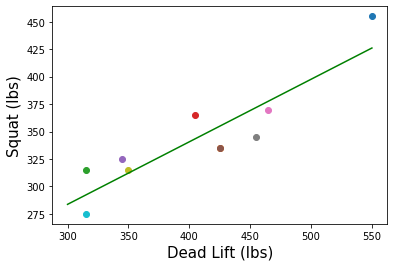

In [5]:
slope_l, intercept_l = np.polyfit(dead_lift,squat,1)
x_var_l = np.linspace(300,550,3)

for index,row in df.iterrows():
    _ = plt.plot(row['Dead Lift'], row['Squat'], marker='o',linestyle=None)

_ = plt.xlabel('Dead Lift (lbs)', fontsize=15)
_ = plt.ylabel('Squat (lbs)', fontsize=15)
_ = plt.plot(x_var_l, slope_l*x_var_l + intercept_l, color='green')

np.corrcoef(dead_lift, squat)[0,1]



### Displaying an interesting relationship

0.7467509234434394


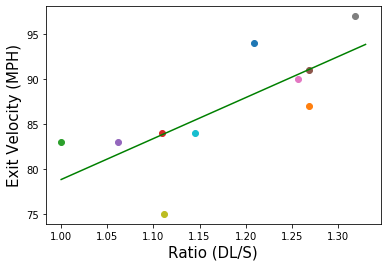

In [6]:
slope_r, intercept_r = np.polyfit(ratio,exit_velocity,1)
x_var_ratio = np.linspace(1,1.33,3)

for index,row in df.iterrows():
    _ = plt.plot(row['Ratio'], row['Exit Velocity'], marker='o',linestyle=None)
    
_ = plt.xlabel('Ratio (DL/S)', fontsize=15)
_ = plt.ylabel('Exit Velocity (MPH)', fontsize=15)
_ = plt.plot(x_var_ratio, slope_r*x_var_ratio + intercept_r, color='green')

cor_matrix = np.corrcoef(ratio, exit_velocity)

cor_coef = cor_matrix[0,1]

print(cor_coef)

### Cool, but maybe I just got lucky... how signifigant is this data

From here:

1. create a random sample of ratios and exit velocities in the same bounds with the same number of samples
2. attain the correlation coefficents of each trial
3. plot the corelation coeffictients on a histogram 
4. attain the p-value of the original data given assumptions
5. reject or fail to reject null hypothesis based on CI

In [7]:
import random 

np.random.seed(111)

pool_ratio, pool_ev, size = np.linspace(1,1.33,100), np.linspace(75,97,100), 10

sample_ratios = [] 

sample_ev = []

for i in range(100):
    x = np.random.choice(pool_ratio, size=size, replace=True)
    sample_ratios.append(x)

for i in range(100):
    y = np.random.choice(pool_ev, size=size, replace=True)
    sample_ev.append(y)

ziptogether = zip(sample_ratios, sample_ev)
    
sdf = pd.DataFrame(ziptogether, columns = ['Sample Ratio', 'Sample EV'])

print(sdf.shape)

(100, 2)


## Implimenting Monte Carlo Methods

In [8]:
import random 

np.random.seed(111)

pool_ratio, pool_ev, size = np.linspace(1,1.33,100), np.linspace(75,97,100), 10

sample_ratios = [] 

sample_ev = []

sample_cor_coeffs = []

for i in range(10000):
    x = np.random.choice(pool_ratio, size=size, replace=True)
    sample_ratios.append(x)

    y = np.random.choice(pool_ev, size=size, replace=True)
    sample_ev.append(y)
    
    #_ = plt.plot(x,y,marker='o',linestyle=None)
    
    scc = np.corrcoef(x,y)[0,1]
    sample_cor_coeffs.append(scc)
    #print(scc)

In [9]:
import itertools as IT

sample_cor_coeffs = []

for index,row in sdf.iterrows():
    x,y = row[0],row[1]
    scc = np.corrcoef(x,y)[0,1]
    sample_cor_coeffs.append(scc)
    


 P-Value:  0.01


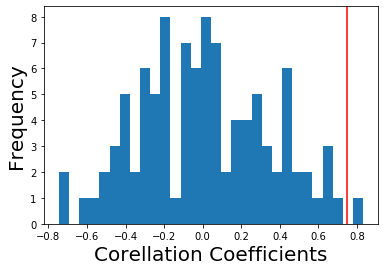

In [10]:
#Plotting the corelation coefficients in a Histogram

_ = plt.hist(sample_cor_coeffs, bins=30)
_ = plt.axvline(x=0.7467509234434394, color='red')
_ = plt.xlabel('Corellation Coefficients', fontsize=20)
_ = plt.ylabel("Frequency", fontsize=20)

amt = np.array(sample_cor_coeffs) > 0.74675
pval = sum(amt)/len(amt)
print('\n P-Value: ', pval)

In [11]:
sample_cor_coeffs_array = np.array(sample_cor_coeffs)

ci_95 = np.percentile(sample_cor_coeffs_array,[2.5,97.5])

ci_98 = np.percentile(sample_cor_coeffs_array,[1,99])

print("95% Confidence: ",ci_95)
print("98% Confidence: ",ci_98)

print('My correlation coeff is:',cor_coef)

95% Confidence:  [-0.57912802  0.65033077]
98% Confidence:  [-0.71580712  0.68213089]
My correlation coeff is: 0.7467509234434394


# Signifigance at high confidence levels calls for some biomecanical investigation